# 任务一：插入排序

**实现基本功能**：

　（1）直接插入排序（Straight Insertion Sort）（难度：★★）
 
　（2）折半插入排序（Binary Insertion Sort）（难度：★★）

　（3）希尔排序（Shell's Sort）（难度：★★★）


## 1. 直接插入排序

　　直接插入排序是一种最简单的排序方法，其基本操作是将一条记录插入到已排好序的有序表中，从而得到一个新的、记录数量增1的有序表。
	
　　算法步骤：
	
![Image Name](https://cdn.kesci.com/upload/image/qxppijh25f.png)

### 1.1 创建直接插入排序函数

In [1]:
def InsertSort(sqlist): # 直接插入排序函数
    for i in range(1, len(sqlist)): # 首先以第一个数为基础，遍历第2个到最后一个数
        if sqlist[i] < sqlist[i-1]: # 如果待插入的数小于序列最后一个数
            temp = sqlist[i]        # 将待插入记录存入一个临时变量中
            sqlist[i] = sqlist[i-1] # 将序列最后一个数往后移一位
            
            if i == 1: # 当有序序列中只有一个数时，这时只需要交换两个位置即可
                sqlist[i-1] = temp
                continue
            j = i - 2 # 当有序序列有两个及以上的数时
            while(temp < sqlist[j] and j >= 0): # 从后往前寻找插入位置
                sqlist[j+1] = sqlist[j] # 记录逐个后移，直到找到正确位置
                j = j - 1 # 依次递减
            sqlist[j+1] = temp # 找到正确位置，将待插入记录赋值
            
    return sqlist

### 1.2 测试

In [2]:
import random
random.seed(1)
sqlist = [random.randint(1,100) for i in range(10)]
temp = sqlist.copy()
sqlist_sort = InsertSort(sqlist)
print("  原始序列：", temp)
print("排序后序列：", sqlist_sort)

  原始序列： [18, 73, 98, 9, 33, 16, 64, 98, 58, 61]
排序后序列： [9, 16, 18, 33, 58, 61, 64, 73, 98, 98]


## 2. 折半插入排序

　　采用折半查找来代替顺序查找；
	
　　算法步骤：
	
![Image Name](https://cdn.kesci.com/upload/image/qxppjr3z1m.png)

### 2.1 创建折半插入排序函数

In [3]:
def BInsertSort(sqlist): # 折半插入排序函数
    for i in range(1, len(sqlist)): # 首先以第一个数为基础，遍历第2个到最后一个数
        temp = sqlist[i]        # 将待插入记录存入一个临时变量中
        low = 0
        high = i-1
        # 在sqlist[low, high]范围内折半查找插入的位置
        while(low <= high):
            mid = int((low + high)/2) # 找到中间位置
            if temp < sqlist[mid]: # 判断待插入的记录跟中位数的大小，如果中位数大，说明插入点应该在前一子表
                high = mid - 1
            else: # 如果中位数小，说明插入点在后一子表
                low = mid + 1
        # 以上循环最终遍历后的结果就是，low=mid，high=low-1
        
        # 找到要插入的位置之后，该位置之后的所有记录后移，while就是遍历这些记录
        j = i - 1
        while(j >= high + 1):
            sqlist[j+1] = sqlist[j]
            j = j - 1
        sqlist[high+1] = temp # 将记录插入到正确位置
            
    return sqlist

### 2.2 测试

In [4]:
sqlist_BInsertSort = BInsertSort(sqlist)
print("  原始序列：", temp)
print("排序后序列：", sqlist_BInsertSort)

  原始序列： [18, 73, 98, 9, 33, 16, 64, 98, 58, 61]
排序后序列： [9, 16, 18, 33, 58, 61, 64, 73, 98, 98]


## 3. 希尔排序

　　希尔排序的具体实现思路是：先将整个记录表分割成若干部分，分别进行直接插入排序，然后再对整个记录表进行一次直接插入排序。
	
　　算法步骤：
	
![Image Name](https://cdn.kesci.com/upload/image/qxpplb1jpk.png)

![Image Name](https://cdn.kesci.com/upload/image/qxppl2622f.png)
	

### 3.1 创建希尔插入排序函数 

In [5]:
## 对顺序表sqlist做一趟增量是dk的希尔插入排序
def ShellInsert(sqlist, dk):
    for i in range(dk, len(sqlist)): # 每隔dk遍历一次
        if sqlist[i] < sqlist[i-dk]: # 如果后面的小于前面，则
            temp = sqlist[i]
            j = i-dk
            while(j >= 0 and temp < sqlist[j]):
                sqlist[j+dk] = sqlist[j] # 记录后移，直到找到插入位置
                j = j-dk
            sqlist[j+dk] = temp # 将temp即原sqlist[i]，插入到正确位置
    
## 按增量序列dt[0..t-1]对顺序表L作t次希尔排序
def ShellSort(sqlist, dt):
    t = len(dt) # 希尔排序次数
    for k in range(0, t):
        ShellInsert(sqlist, dt[k]) # 一次增量为dt[k]的的希尔插入排序

### 3.2 测试

![Image Name](https://cdn.kesci.com/upload/image/qxpu08c3se.png)

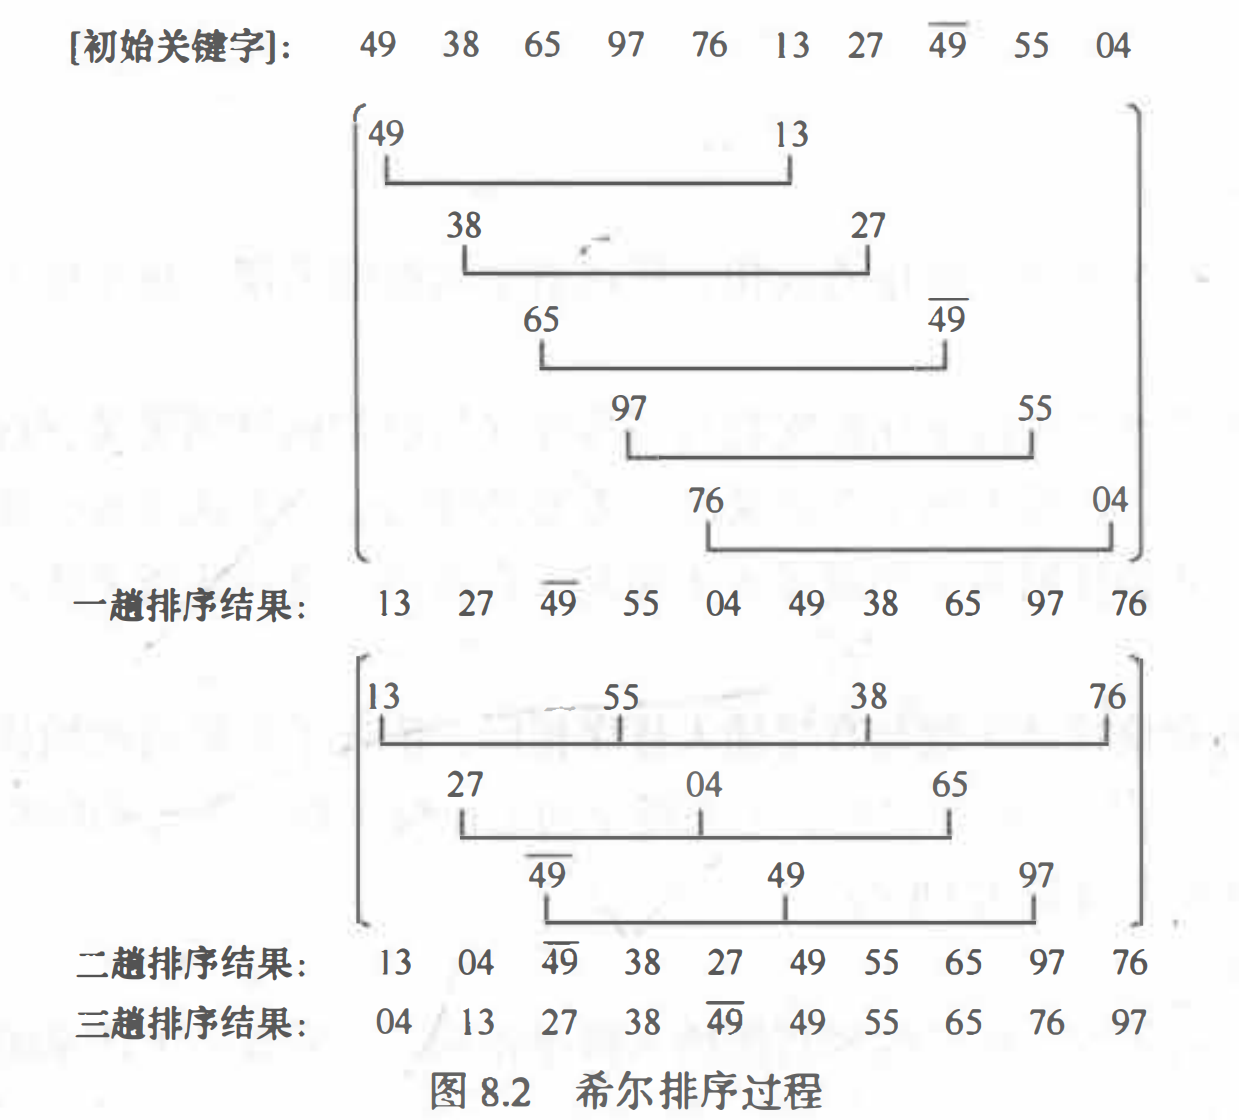

In [6]:
# 按照课本给的例子来测试
sqlist = [49, 38, 65, 97, 76, 13, 27, 49, 55, 4]
dt = [5, 3, 1] # 增量依次选取5,3和1；
print(" 原始序列：", sqlist)
ShellSort(sqlist, dt) # 调用希尔排序函数
print("排序后序列：", sqlist)

 原始序列： [49, 38, 65, 97, 76, 13, 27, 49, 55, 4]
排序后序列： [4, 13, 27, 38, 49, 49, 55, 65, 76, 97]
